# Clustering Basics

**Load necessary packages and apply custom configurations**

In [2]:
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-muted')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.color_palette("RdBu", n_colors=10)

# Interactive plots embedded within the notebook
#%matplotlib notebook 
# Static images of plots embedded within the notebook
# %matplotlib inline   
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
import sklearn as sk

#pd.options.plotting.backend = "plotly" 
# Conflict with options in original matplotlib.

print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version', sns.__version__)
print('Statsmodels version', sm.__version__)
print('Sklearn version', sk.__version__)

Numpy version 1.26.4
Pandas version 2.2.3
Seaborn version 0.13.2
Statsmodels version 0.14.4
Sklearn version 1.6.1


In [3]:
font_size=13
params = {'legend.fontsize': 'large',
          'figure.figsize': (5,4),
          'axes.labelsize': font_size,
          'axes.titlesize': font_size,
          'xtick.labelsize': font_size*0.8,
          'ytick.labelsize': font_size*0.8,
          'axes.titlepad': 25}
plt.rcParams.update(params)

## <font color='orange'>Part I: K-means Clustering<font>

### Apply K-mean clustering to dataset 1

In [5]:
data = pd.read_excel('clustering-basics.xlsx', sheet_name='Dataset1')
data.head()


,X1,X2
0,-1.180026,-0.750860
1,-1.488851,-0.714801
2,-0.828153,-0.916925
3,0.792955,-0.910485
4,-1.988658,-1.318758


In [6]:
# เลือกเฉพาะคอลัมน์ตัวเลข ถ้ามีคอลัมน์อื่นเช่นชื่อ ให้ตัดออกก่อน
X = data.select_dtypes(include='number')



In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# สร้างและ fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # เปลี่ยน n_clusters ตามที่ต้องการ
kmeans.fit(X)

# ดึงผลลัพธ์
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
sse = kmeans.inertia_

# แสดงผล
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n{centroids}")


KMeans(n_clusters=3, random_state=42)

Sum of squared errors : 449.611

Centroids : 
[[ 1.066 -0.974]
 [ 1.138  1.057]
 [-1.041 -1.009]]


In [8]:
data['Cluster'] = labels
data.head()


,X1,X2,Cluster
0,-1.180026,-0.750860,2
1,-1.488851,-0.714801,2
2,-0.828153,-0.916925,2
3,0.792955,-0.910485,0
4,-1.988658,-1.318758,2


<Figure size 600x500 with 0 Axes>

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

Text(0.5, 1.0, 'KMeans Clustering')

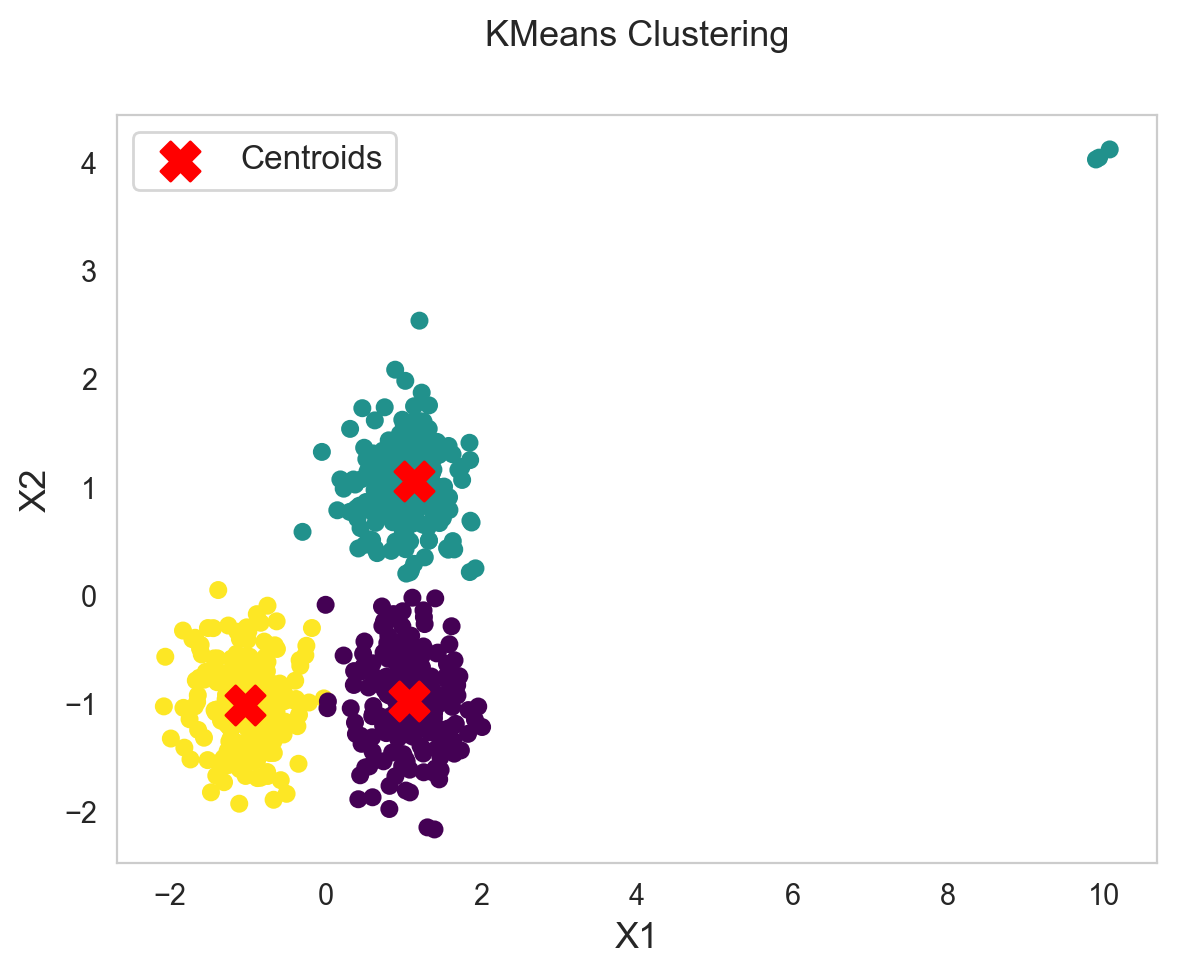

In [9]:
import matplotlib.pyplot as plt

# วาดกราฟคลัสเตอร์
plt.figure(figsize=(6,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('KMeans Clustering')
plt.legend()
plt.tight_layout()
plt.show()


### Apply K-mean clustering to dataset 2

In [ ]:
data = pd.read_excel('clustering-basics.xlsx', sheet_name='Dataset2')
data.head()

,X1,X2
0,-0.087696,1.085978
1,-0.837558,0.547310
2,0.796843,0.411495
3,0.212158,0.106985
4,-0.053684,0.979634


In [11]:
# เลือกเฉพาะคอลัมน์ตัวเลข ถ้ามีคอลัมน์อื่นเช่นชื่อ ให้ตัดออกก่อน
X = data.select_dtypes(include='number')

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# สร้างและ fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # เปลี่ยน n_clusters ตามที่ต้องการ
kmeans.fit(X)

# ดึงผลลัพธ์
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
sse = kmeans.inertia_

# แสดงผล
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n{centroids}")


KMeans(n_clusters=3, random_state=42)

Sum of squared errors : 275.271

Centroids : 
[[ 0.825  0.153]
 [-0.136  0.179]
 [-0.246 -0.721]]


In [ ]:
data['Cluster'] = labels
data.head()

,X1,X2,Cluster
0,-0.087696,1.085978,1
1,-0.837558,0.547310,1
2,0.796843,0.411495,0
3,0.212158,0.106985,1
4,-0.053684,0.979634,1


<Figure size 600x500 with 0 Axes>

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

Text(0.5, 1.0, 'KMeans Clustering')

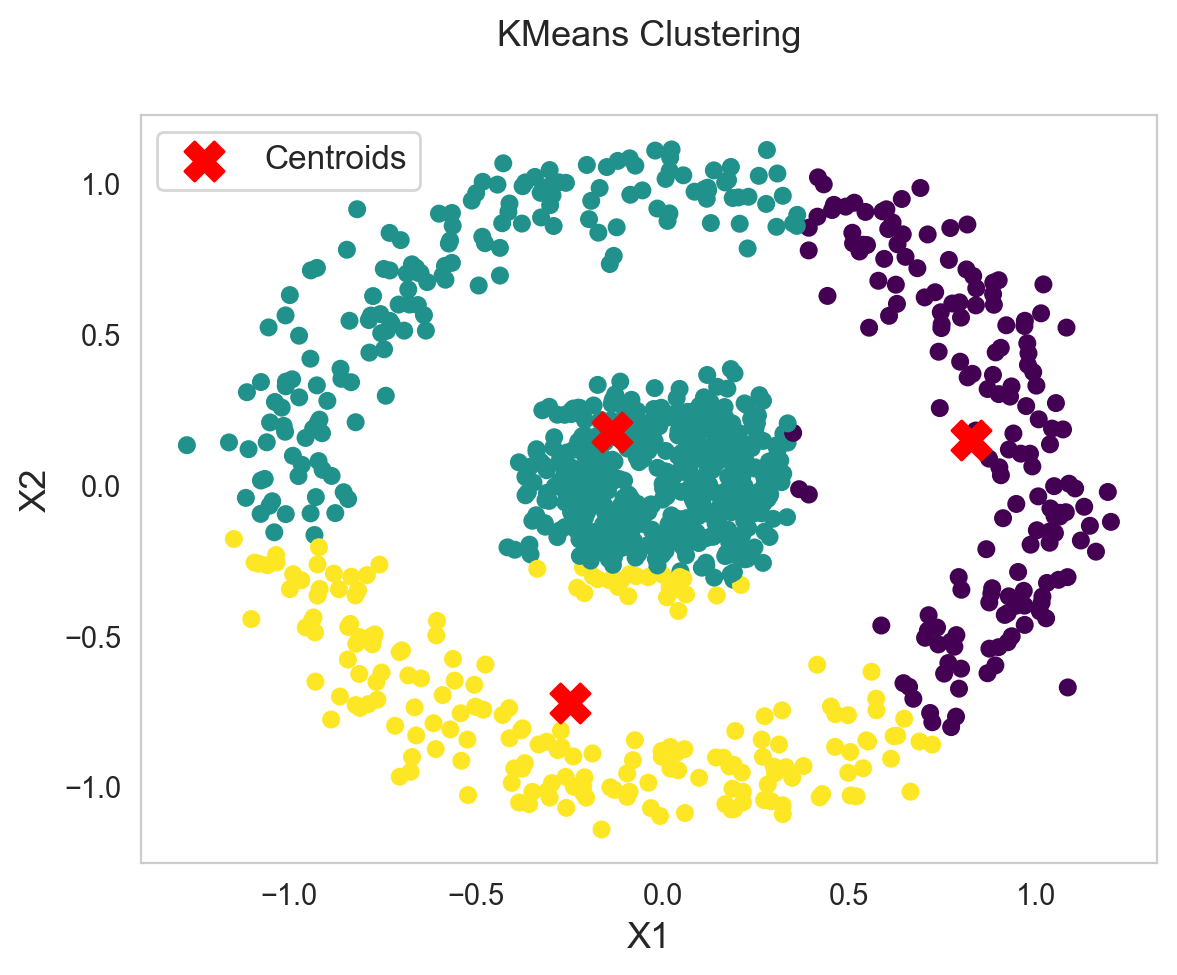

In [14]:
import matplotlib.pyplot as plt

# วาดกราฟคลัสเตอร์
plt.figure(figsize=(6,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('KMeans Clustering')
plt.legend()
plt.tight_layout()
plt.show()


### Apply K-mean clustering to dataset 3

In [15]:
data = pd.read_excel('clustering-basics.xlsx', sheet_name='Dataset3')
data.head()

,X1,X2
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185


In [16]:
# เลือกเฉพาะคอลัมน์ตัวเลข ถ้ามีคอลัมน์อื่นเช่นชื่อ ให้ตัดออกก่อน
X = data.select_dtypes(include='number')

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# สร้างและ fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # เปลี่ยน n_clusters ตามที่ต้องการ
kmeans.fit(X)

# ดึงผลลัพธ์
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
sse = kmeans.inertia_

# แสดงผล
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n{centroids}")


KMeans(n_clusters=3, random_state=42)

Sum of squared errors : 135.150

Centroids : 
[[-0.455  0.684]
 [ 1.627 -0.141]
 [ 0.565  0.153]]


In [18]:
data['Cluster'] = labels
data.head()

,X1,X2,Cluster
0,0.830586,-0.447733,2
1,0.701678,0.816918,2
2,1.022080,-0.492571,1
3,-0.316765,0.953438,0
4,0.293226,1.057185,0


<Figure size 600x500 with 0 Axes>

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

Text(0.5, 1.0, 'KMeans Clustering')

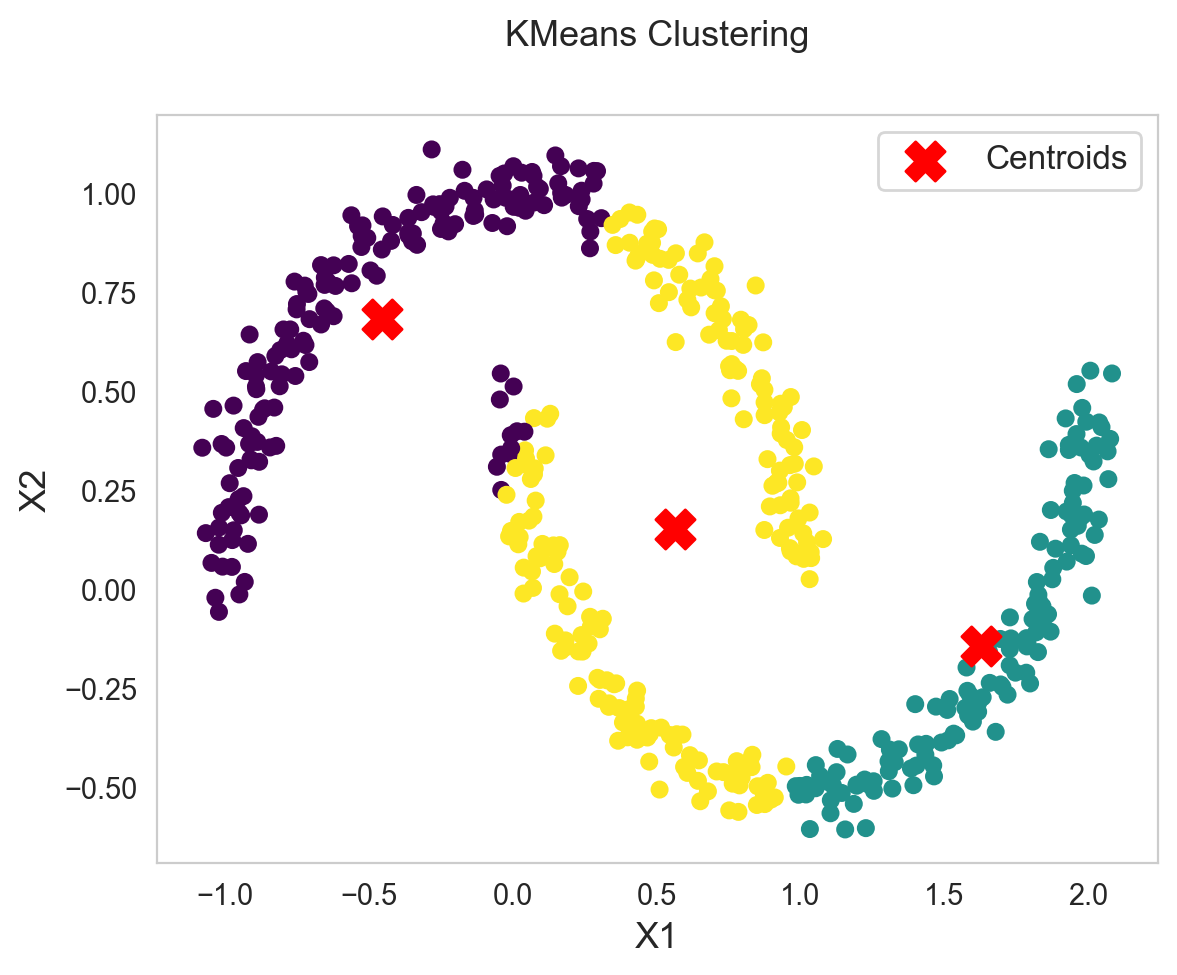

In [19]:
import matplotlib.pyplot as plt

# วาดกราฟคลัสเตอร์
plt.figure(figsize=(6,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('KMeans Clustering')
plt.legend()
plt.tight_layout()
plt.show()


### Apply K-mean clustering to dataset 4

In [20]:
data = pd.read_excel('clustering-basics.xlsx', sheet_name='Dataset4')
data.head()

,X1,X2
0,1.225160,-0.951731
1,1.016304,-1.725175
2,0.335340,-1.724896
3,1.786348,-1.782653
4,1.016751,1.062569


In [21]:
# เลือกเฉพาะคอลัมน์ตัวเลข ถ้ามีคอลัมน์อื่นเช่นชื่อ ให้ตัดออกก่อน
X = data.select_dtypes(include='number')

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# สร้างและ fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # เปลี่ยน n_clusters ตามที่ต้องการ
kmeans.fit(X)

# ดึงผลลัพธ์
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
sse = kmeans.inertia_

# แสดงผล
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n{centroids}")


KMeans(n_clusters=3, random_state=42)

Sum of squared errors : 806.607

Centroids : 
[[ 0.924  0.119]
 [ 0.728 -2.026]
 [-1.218 -1.3  ]]


In [23]:
data['Cluster'] = labels
data.head()

,X1,X2,Cluster
0,1.225160,-0.951731,0
1,1.016304,-1.725175,1
2,0.335340,-1.724896,1
3,1.786348,-1.782653,1
4,1.016751,1.062569,0


<Figure size 600x500 with 0 Axes>

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

Text(0.5, 1.0, 'KMeans Clustering')

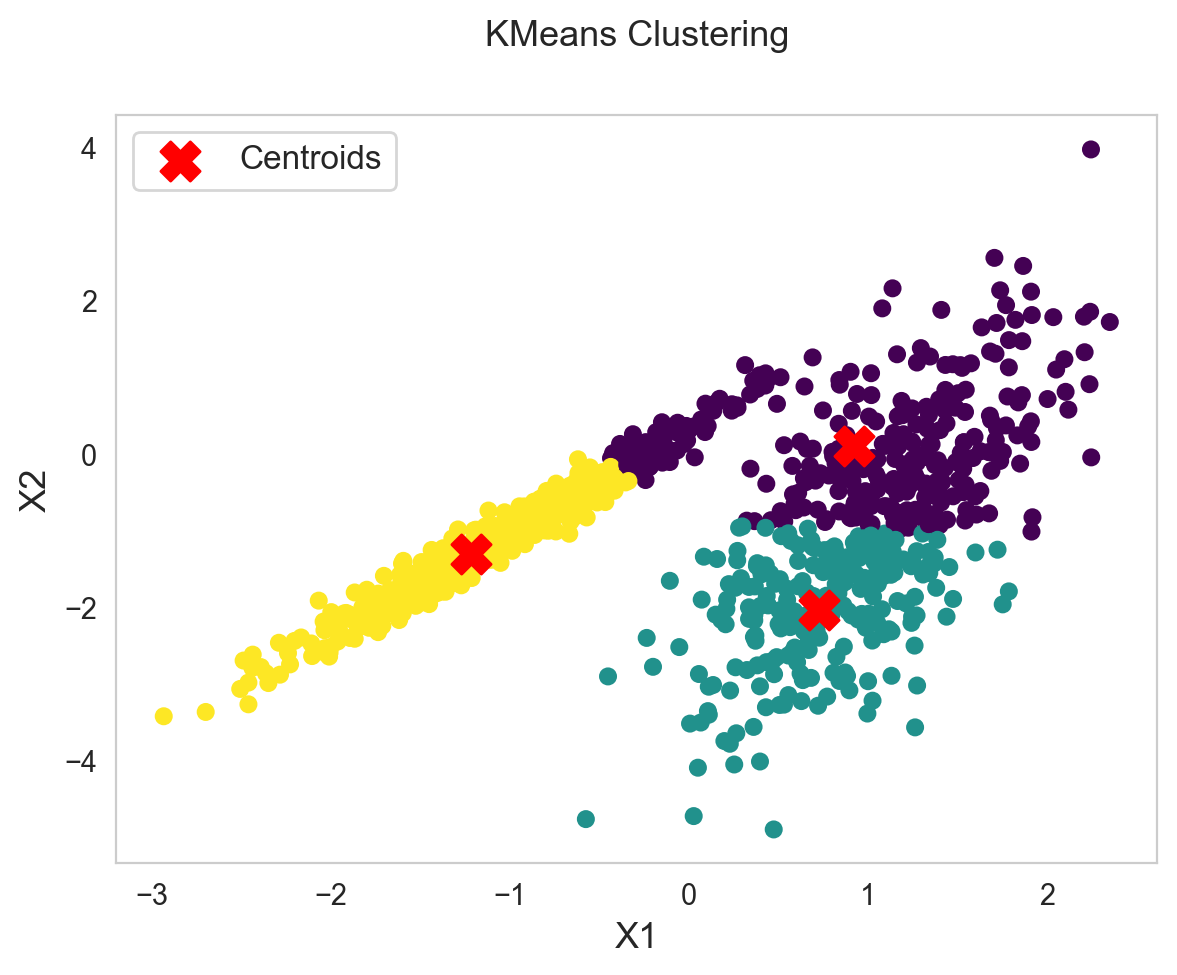

In [24]:
import matplotlib.pyplot as plt

# วาดกราฟคลัสเตอร์
plt.figure(figsize=(6,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('KMeans Clustering')
plt.legend()
plt.tight_layout()
plt.show()


## <font color='darkorange'>Part II: Clustering Wine Data</font>

### Load and scale the dataset

In [25]:
from sklearn.datasets import load_wine
import pandas as pd

# โหลด Wine dataset
wine = load_wine()

# สร้าง DataFrame
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target  # เพิ่ม label ของกลุ่ม
data.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [26]:
from sklearn.cluster import KMeans

# กำหนดจำนวนคลัสเตอร์ (เช่น 3 คลัสเตอร์)
kmeans = KMeans(n_clusters=3, random_state=42)

# fit โมเดล
kmeans.fit(data.drop('target', axis=1))  # ลบคอลัมน์ 'target' ออก

# ดึงข้อมูล
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# แสดงผล
print(f"Cluster Labels:\n{labels}")
print(f"Centroids:\n{centroids}")


KMeans(n_clusters=3, random_state=42)

Cluster Labels:
[1 1 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 2 2 1 2 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 2 2 2 2 2 1 2 1 2 2 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0]
Centroids:
[[1.260e+01 2.453e+00 2.322e+00 2.065e+01 9.370e+01 2.054e+00 1.648e+00
  3.960e-01 1.425e+00 4.673e+00 9.178e-01 2.395e+00 5.216e+02]
 [1.337e+01 2.400e+00 2.393e+00 1.851e+01 1.091e+02 2.442e+00 2.214e+00
  3.255e-01 1.707e+00 5.188e+00 9.597e-01 2.848e+00 9.063e+02]
 [1.385e+01 1.779e+00 2.488e+00 1.693e+01 1.056e+02 2.941e+00 3.137e+00
  2.989e-01 2.007e+00 6.275e+00 1.103e+00 3.002e+00 1.309e+03]]


In [27]:
# เพิ่ม label ของ cluster ลงใน DataFrame
data['Cluster'] = labels

# แสดงข้อมูลที่มี label ของ cluster
print(data.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  Cluster  
0 

<Figure size 600x500 with 0 Axes>

Text(0.5, 1.0, 'PCA Reduced KMeans Clustering of Wine Data')

Text(0.5, 0, 'PCA 1')

Text(0, 0.5, 'PCA 2')

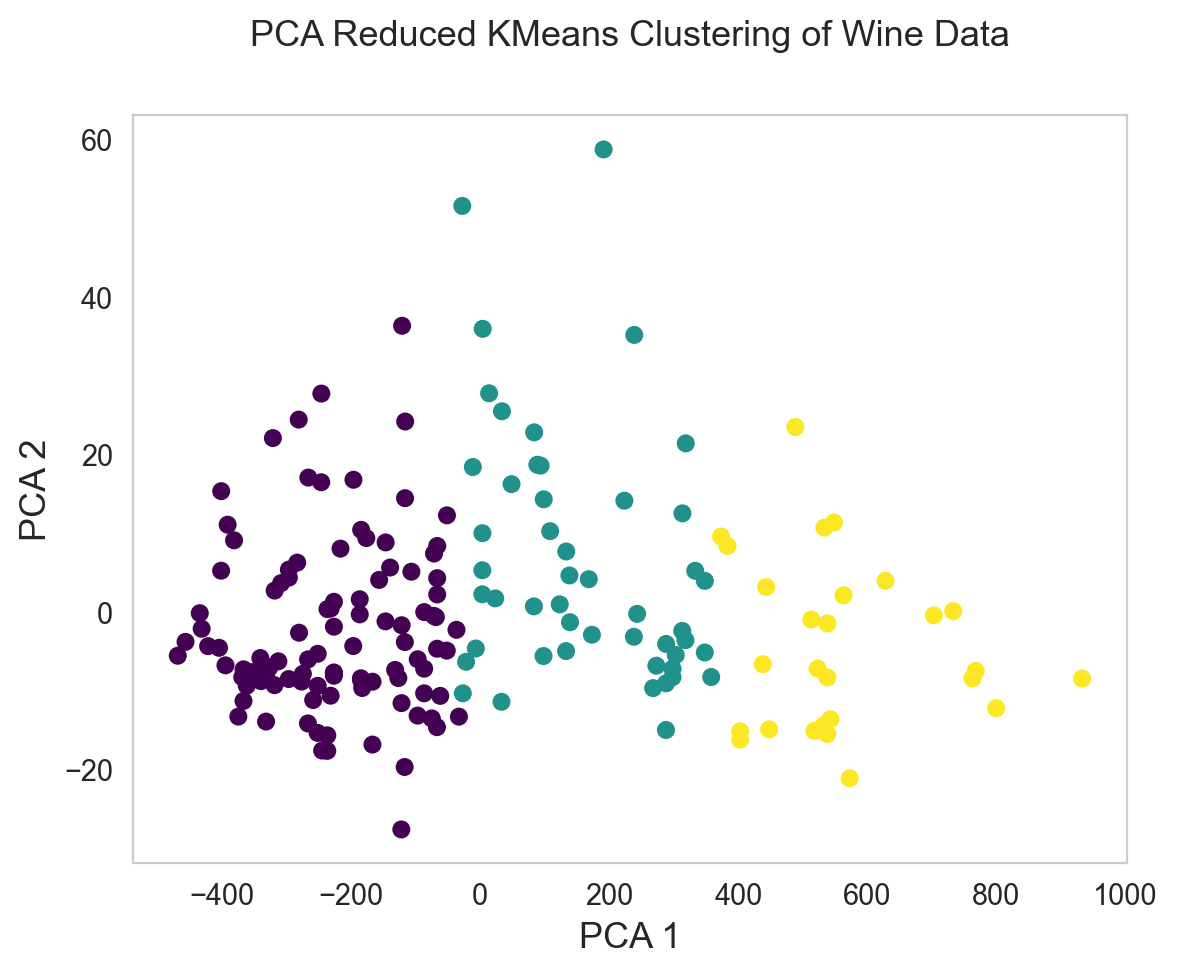

In [29]:
from sklearn.decomposition import PCA

# ใช้ PCA ลดมิติให้เหลือ 2 มิติ
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.drop(['target', 'Cluster'], axis=1))

# วาดกราฟ
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30)
plt.title('PCA Reduced KMeans Clustering of Wine Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()


### Apply PCA to the data. 

Apply PCA with 8 components

In [33]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.datasets import load_wine

# โหลด Wine dataset
wine = load_wine()

# สร้าง DataFrame
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# ใช้ PCA เพื่อลดมิติให้เหลือ 8 components
pca = PCA(n_components=8)
X_pca = pca.fit_transform(data)

# แสดงผลลัพธ์ของ PCA
print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

# สรุปการกระจายข้อมูลหลังจากการใช้ PCA
print(f"\nCumulative explained variance ratio:")
print(pca.explained_variance_ratio_.cumsum())

# ผลลัพธ์ PCA
print(f"\nPCA Transformed Data (First 5 rows):")
print(X_pca[:5, :])  # แสดงแค่ 5 แถวแรก


Explained variance ratio by each component:
[9.981e-01 1.736e-03 9.496e-05 5.022e-05 1.236e-05 8.462e-06 2.807e-06
 1.523e-06]

Cumulative explained variance ratio:
[0.998 1.    1.    1.    1.    1.    1.    1.   ]

PCA Transformed Data (First 5 rows):
[[ 3.186e+02  2.149e+01 -3.131e+00  2.501e-01 -6.771e-01  5.681e-01
   6.196e-01  1.996e-01]
 [ 3.031e+02 -5.365e+00 -6.823e+00  8.640e-01  4.861e-01  1.434e-02
  -1.089e-01 -6.047e-01]
 [ 4.381e+02 -6.537e+00  1.113e+00 -9.124e-01 -3.807e-01  6.724e-01
  -7.858e-01  5.009e-01]
 [ 7.332e+02  1.927e-01  9.173e-01  5.413e-01 -8.587e-01  5.991e-01
  -1.877e-02 -1.904e-01]
 [-1.157e+01  1.849e+01  5.544e-01 -1.361e+00 -2.764e-01  7.689e-01
   3.100e-01 -1.191e-01]]


Show the principal components 

In [34]:
# แสดง Principal Components (เวกเตอร์)
print("Principal Components (Each column is a principal component):")
print(pca.components_)

# แสดงชื่อของ features ที่แสดงผลในแต่ละ principal component
print("\nFeatures contributing to each component:")
for i, component in enumerate(pca.components_):
    print(f"Principal Component {i+1}:")
    for feature, value in zip(data.columns, component):
        print(f"  {feature}: {value:.3f}")
    print()

Principal Components (Each column is a principal component):
[[ 1.659e-03 -6.810e-04  1.949e-04 -4.671e-03  1.787e-02  9.898e-04
   1.567e-03 -1.231e-04  6.006e-04  2.327e-03  1.714e-04  7.049e-04
   9.998e-01]
 [ 1.203e-03  2.155e-03  4.594e-03  2.645e-02  9.993e-01  8.780e-04
  -5.185e-05 -1.354e-03  5.004e-03  1.510e-02 -7.627e-04 -3.495e-03
  -1.777e-02]
 [ 1.687e-02  1.220e-01  5.199e-02  9.386e-01 -2.978e-02 -4.048e-02
  -8.544e-02  1.351e-02 -2.466e-02  2.914e-01 -2.598e-02 -7.032e-02
   4.529e-03]
 [ 1.414e-01  1.604e-01 -9.773e-03 -3.310e-01 -5.394e-03 -7.458e-02
  -1.691e-01  1.081e-02 -5.012e-02  8.789e-01 -6.003e-02 -1.782e-01
  -3.113e-03]
 [-2.034e-02  6.129e-01 -2.018e-02 -6.435e-02  6.149e-03 -3.152e-01
  -5.248e-01  2.965e-02 -2.512e-01 -3.317e-01 -5.152e-02 -2.606e-01
   2.299e-03]
 [ 1.941e-01  7.425e-01  4.175e-02 -2.407e-02 -1.924e-03  2.787e-01
   4.336e-01 -2.195e-02  2.419e-01  2.740e-03 -2.378e-02  2.889e-01
  -1.212e-03]
 [ 9.233e-01 -1.501e-01  4.501e-02  3.1

<font color='orange'> **Questions**</font>

Using threshold 0.35 for the loadings,
- What are important features in PC1?
- What are important features in PC2? 

In [35]:
import numpy as np

# กำหนด threshold
threshold = 0.35

# แสดง Principal Components (PC1 และ PC2)
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1]

# คัดเลือก features ที่มี loading มากกว่า threshold
important_features_pc1 = [feature for feature, loading in zip(data.columns, pc1_loadings) if abs(loading) > threshold]
important_features_pc2 = [feature for feature, loading in zip(data.columns, pc2_loadings) if abs(loading) > threshold]

# แสดงผลลัพธ์
print("Important features in PC1 (Threshold 0.35):")
print(important_features_pc1)

print("\nImportant features in PC2 (Threshold 0.35):")
print(important_features_pc2)


Important features in PC1 (Threshold 0.35):
['proline']

Important features in PC2 (Threshold 0.35):
['magnesium']


Determine PVE by each PC and the cumulative PVE

In [36]:
# PVE: Proportion of Variance Explained (ต่อ PC)
pve = pca.explained_variance_ratio_

# Cumulative PVE
cumulative_pve = pve.cumsum()

# แสดงผล
print("PVE (Proportion of Variance Explained) by each PC:")
for i, val in enumerate(pve):
    print(f"PC{i+1}: {val:.4f}")

print("\nCumulative PVE:")
for i, val in enumerate(cumulative_pve):
    print(f"PC1 to PC{i+1}: {val:.4f}")


PVE (Proportion of Variance Explained) by each PC:
PC1: 0.9981
PC2: 0.0017
PC3: 0.0001
PC4: 0.0001
PC5: 0.0000
PC6: 0.0000
PC7: 0.0000
PC8: 0.0000

Cumulative PVE:
PC1 to PC1: 0.9981
PC1 to PC2: 0.9998
PC1 to PC3: 0.9999
PC1 to PC4: 1.0000
PC1 to PC5: 1.0000
PC1 to PC6: 1.0000
PC1 to PC7: 1.0000
PC1 to PC8: 1.0000


Apply PCA to reduce the data dimension by using the number of PCs that provides at least 80% of the cumulative PVE.

In [37]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

# โหลดข้อมูล Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Fit PCA โดยยังไม่กำหนดจำนวน components
pca_full = PCA()
pca_full.fit(X)

# คำนวณ cumulative PVE
cumulative_pve = np.cumsum(pca_full.explained_variance_ratio_)

# หาจำนวน components ที่อธิบายข้อมูลได้อย่างน้อย 80%
n_components_80 = np.argmax(cumulative_pve >= 0.80) + 1

print(f"Number of components to retain at least 80% PVE: {n_components_80}")

# ทำ PCA โดยใช้จำนวน components ที่หาได้
pca_final = PCA(n_components=n_components_80)
X_reduced = pca_final.fit_transform(X)

print(f"Shape of reduced data: {X_reduced.shape}")


PCA()

Number of components to retain at least 80% PVE: 1
Shape of reduced data: (178, 1)


### Applying clustering to PC scores 
When the original data is high-dimensional, 
- clustering PC scores could significantly save memory and time. 
- clustering is easier to visualize by looking at the first few PCs.

Fit K-means with the optimal number of clusters

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Number of clusters (k)')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Elbow Method')

<Axes: >

Text(0.5, 0, 'Number of clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0.5, 1.0, 'Silhouette Score')

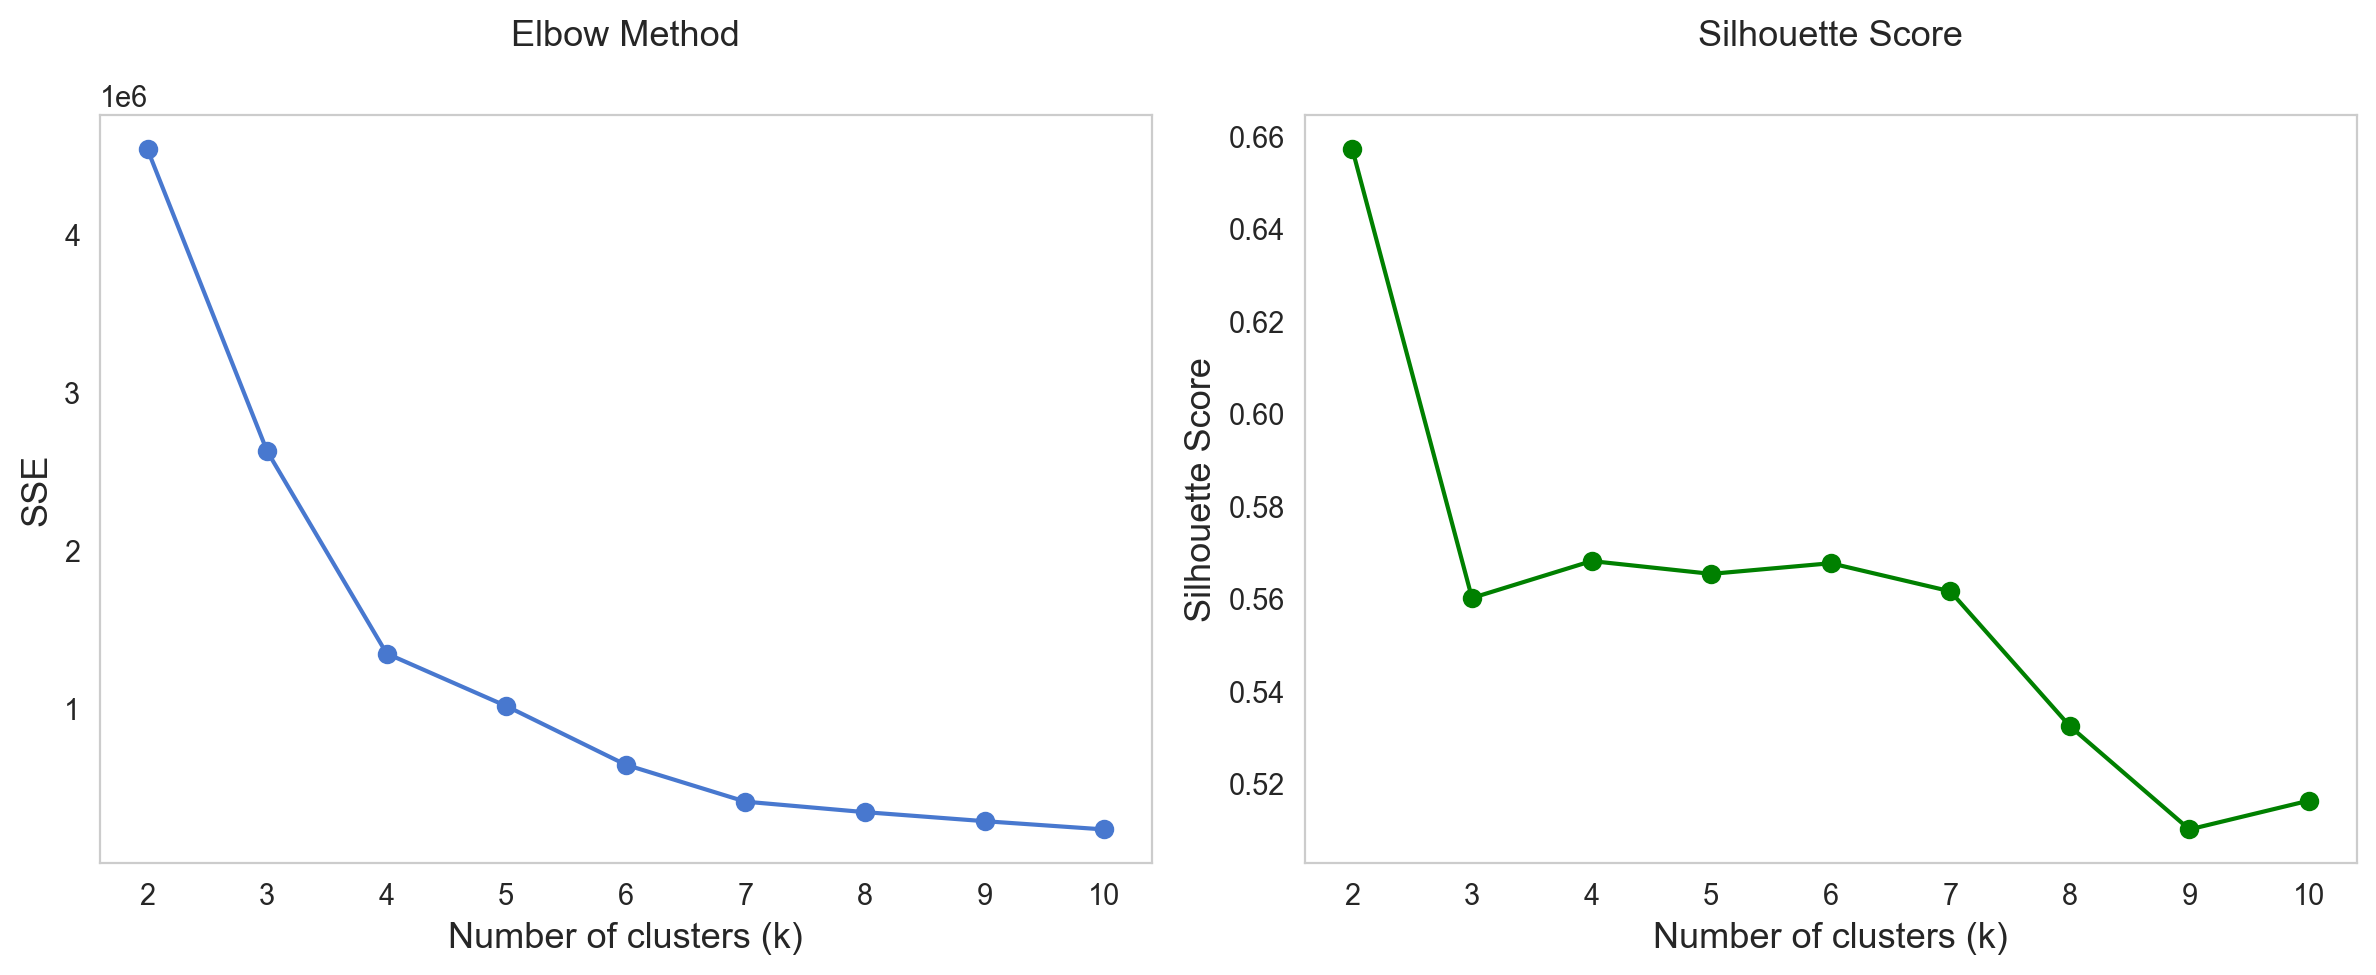

✅ Optimal number of clusters based on silhouette score: 2


In [43]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# โหลดข้อมูล Wine dataset และลดมิติเหลือ 2D เพื่อ visualization
wine = load_wine()
X = wine.data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# หา SSE และ Silhouette Score สำหรับแต่ละจำนวนคลัสเตอร์
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)  # ค่า SSE
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

# วาด Elbow plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')

# วาด Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

# เลือกจำนวน cluster ที่ให้ Silhouette Score สูงสุด
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"✅ Optimal number of clusters based on silhouette score: {optimal_k}")

# Fit KMeans ด้วยจำนวน clusters ที่เหมาะสม
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = kmeans_final.fit_predict(X_pca)



### Visualize the clustering 

<Figure size 600x500 with 0 Axes>

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.5, 1.0, 'K-means Clustering (k=2) on PCA-Reduced Data')

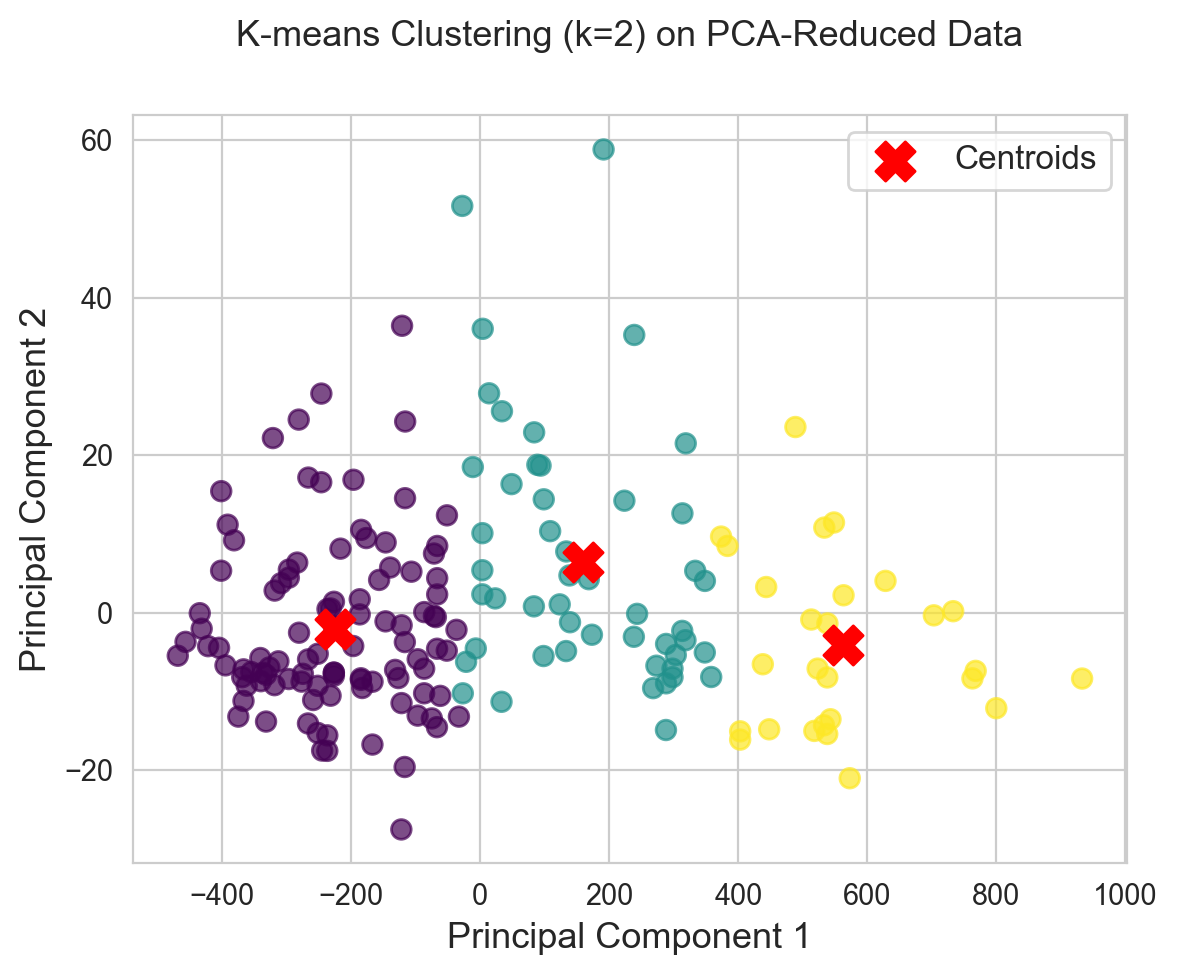

In [42]:
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-means Clustering (k={optimal_k}) on PCA-Reduced Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights from the clustering

Compute the average of variables in the original scale of each cluster. 

In [49]:
# โหลดข้อมูล
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# ลดมิติ + ทำ K-means
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# เพิ่ม label กลับเข้า DataFrame ต้นฉบับ
X_with_labels = X.copy()
X_with_labels['Cluster'] = labels

# คำนวณค่าเฉลี่ยของตัวแปรต้นฉบับในแต่ละคลัสเตอร์
cluster_means = X_with_labels.groupby('Cluster').mean()


Determine the cluster prototype

In [ ]:
cluster_prototypes = X_with_labels.groupby('Cluster').mean()
print(cluster_prototypes.round(2))

         alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
Cluster                                                            
0          12.60        2.45  2.32              20.65      93.70   
1          13.37        2.40  2.39              18.51     109.08   
2          13.85        1.78  2.49              16.93     105.63   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0                 2.05        1.65                  0.40             1.43   
1                 2.44        2.21                  0.33             1.71   
2                 2.94        3.14                  0.30             2.01   

         color_intensity   hue  od280/od315_of_diluted_wines  proline  
Cluster                                                                
0                   4.67  0.92                          2.39   521.56  
1                   5.19  0.96                          2

### Look at key variables from clustering by using feature importance in decision tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Train Decision Tree
tree = DecisionTreeClassifier(random_state=42, max_depth=4)
tree.fit(X, cluster_labels)

# ดูความสำคัญของ feature
importances = tree.feature_importances_
features = X.columns

# แสดงผลเป็นตาราง
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("🔍 Feature importance from decision tree:")
print(importance_df[importance_df["Importance"] > 0].round(3))

DecisionTreeClassifier(max_depth=4, random_state=42)

🔍 Feature importance from decision tree:
    Feature  Importance
12  proline         1.0


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 13 artists>

Text(0.5, 0, 'Importance')

Text(0.5, 1.0, 'Feature Importance from Decision Tree')

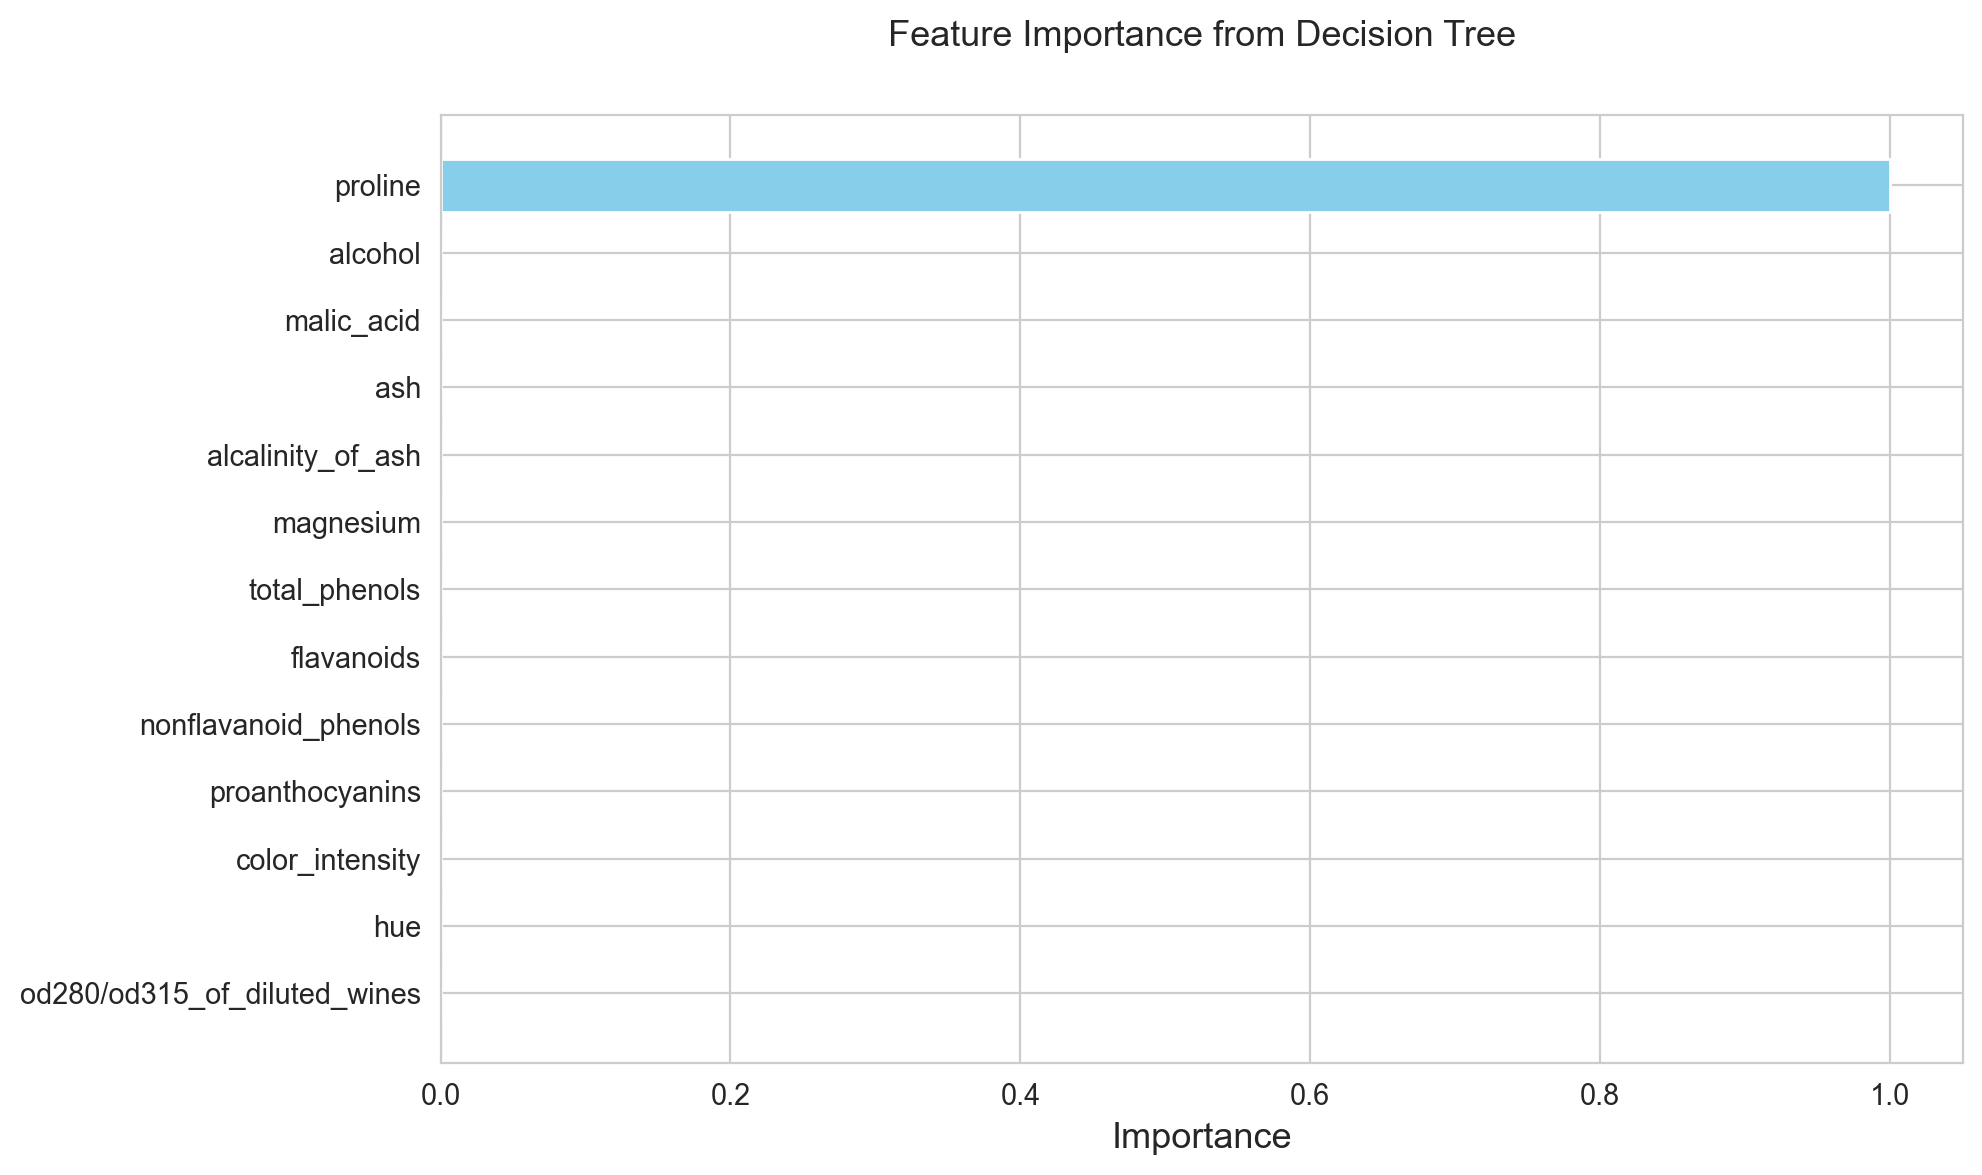

In [52]:
# วาดกราฟความสำคัญ
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


<font color='orange'> **Question** </font> What are the three most important features that contribute to the clustering?